# COVID-19 Visualisation

# Plotting Bar Chart Race Using Python With Matplotlib

### import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
import emoji
from IPython.display import HTML
import warnings
warnings.filterwarnings('ignore')
print('setup complete')

setup complete


### loading the data

In [2]:

conf_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')
death_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv')
reco_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv')

In [3]:
#extracting all the dates
dates = conf_df.columns[4:]

#making new dataframes for confiremed ,death and recovred cases
conf_df_long = conf_df.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
                            value_vars=dates, var_name='Date', value_name='Confirmed')

deaths_df_long = death_df.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
                            value_vars=dates, var_name='Date', value_name='Deaths')

recv_df_long = reco_df.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
                            value_vars=dates, var_name='Date', value_name='Recovered')

#full table combinig all confirmed,recovered and deaths 
full_table = pd.concat([conf_df_long, deaths_df_long['Deaths'], recv_df_long['Recovered']], 
                       axis=1, sort=False)

In [4]:
cases = ['Confirmed', 'Deaths', 'Recovered', 'Active']
#adding active cases to the dataset
full_table['Active'] = full_table['Confirmed'] - full_table['Deaths'] - full_table['Recovered']
#Cleaning 
full_table = full_table[full_table['Province/State'].str.contains(',')!=True]
full_table['Country/Region'] = full_table['Country/Region'].replace('Korea, South', 'South Korea')
full_table['Country/Region'] = full_table['Country/Region'].replace('Mainland China', 'China')
full_table.head()

Province/State Country/Region      Lat      Long     Date  Confirmed  \
0            NaN       Thailand  15.0000  101.0000  1/22/20        2.0   
1            NaN          Japan  36.0000  138.0000  1/22/20        2.0   
2            NaN      Singapore   1.2833  103.8333  1/22/20        0.0   
3            NaN          Nepal  28.1667   84.2500  1/22/20        0.0   
4            NaN       Malaysia   2.5000  112.5000  1/22/20        0.0   

   Deaths  Recovered  Active  
0     0.0        0.0     2.0  
1     0.0        0.0     2.0  
2     0.0        0.0     0.0  
3     0.0        0.0     0.0  
4     0.0        0.0     0.0

## Bar Race Chart Using Flourish App

In [5]:
HTML('''<div class="flourish-embed flourish-bar-chart-race" data-src="visualisation/1651020"><script src="https://public.flourish.studio/resources/embed.js"></script></div>''')

In [6]:
adj_dates = full_table.Date.unique()

In [9]:
df= full_table.copy()

#### But who will update it daily########
# BarChartRace using Python with Matplotlib 

### generate random color hexadecimal  codes

In [10]:

def genratepseudorandomcolors():
    import random
    from colour import Color
    random_i = random.randint(0,10000000)
    random_j = random.randint(0,10000000)
    c = Color(random_i,random_j)
    hex_number = c.hex_l
    return hex_number

### making a list of colors

In [11]:

colours = []
for i in range(len(df['Country/Region'].unique())) :
    colours.append(genratepseudorandomcolors())

### making a dictionary of countries along with colorcodes 

In [12]:
colorsset = dict(zip(
    [i for i in df['Country/Region'].unique()],
    colours
))


In [13]:
start_date ='1/22/20'
current_date = start_date

# Confirmerd Cases

In [14]:


def draw_barchart_conf(current_date):
    
    #creating dataframe for plotting 
    #In each loop it contains top 10 coutires having most number of confirmed cases
    dff = df[df['Date'].eq(current_date)].groupby('Country/Region').sum().sort_values(by='Confirmed', ascending=False).head(10)
    dff = dff.reset_index()
    dff = dff[::-1]
    
    
    
    #Now, let's plot a basic bar chart. We start by creating a figure and an axes.
    #Then, we use `ax.barh(x, y)` to draw horizontal barchart.

    
    ax.clear()
    ax.barh(dff['Country/Region'], dff['Confirmed'], color=[colorsset[x] for x in dff['Country/Region']])
    dx = dff['Confirmed'].max() / 200
    
    
    #Next, let's add text,color,labels

    for i, (value, name) in enumerate(zip(dff['Confirmed'], dff['Country/Region'])):
        
        ax.text(value-dx, i,     name,           size=14, weight=600, ha='right', va='bottom')
        ax.text(value+dx, i,     f'{value:,.0f}',  size=14, ha='left',  va='center')
    
    
    ax.text(1, 0.4, current_date, transform=ax.transAxes, color='#777777', size=46, ha='right', weight=800)
    ax.text(0, 1.06, 'Population (thousands)', transform=ax.transAxes, size=12, color='#777777')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    
    #adding other textual infomations
    ax.text(0, 1.15, f'Most number of confirmed cases in the world from 1/22/20{emoji.emojize(":worried_face:")}',
            transform=ax.transAxes, size=24, weight=600, ha='left', va='top')
    ax.text(1, 0, 'by @aryanc55', transform=ax.transAxes, color='#777777', ha='right',
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    plt.box(False)
    
#draw_barchart_conf(current_date=start_date)

## Animate

To animate, we will use [`FuncAnimation`][FuncAnimation] from `matplotlib.animation`.

[`FuncAnimation`][FuncAnimation] makes an animation by repeatedly calling a function (that draws on canvas). 
In our case, it'll be `draw_barchart`.

`frames` arguments accepts on what values you want to run `draw_barchart` -- we'll
run from `date` 1/22/20  to last updated.

[FuncAnimation]: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.animation.FuncAnimation.html

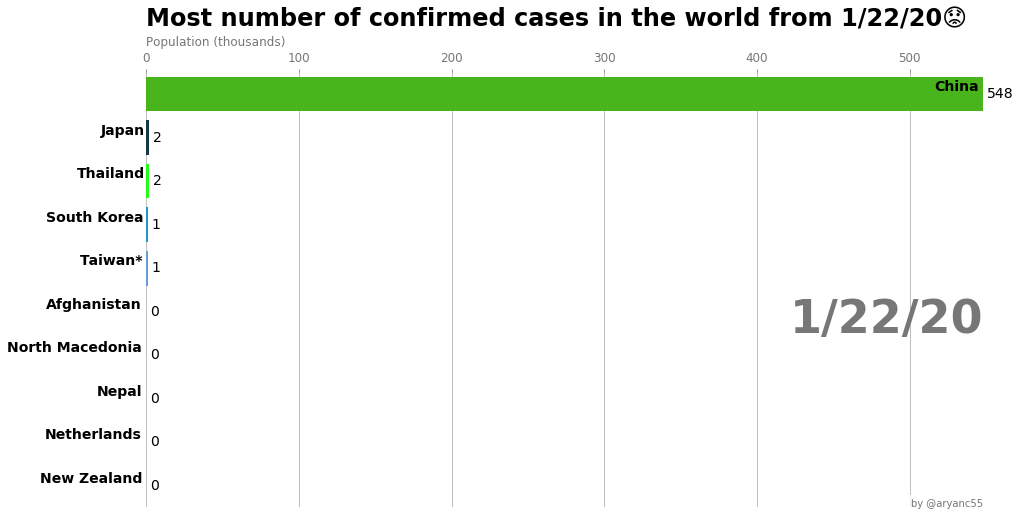

In [15]:
fig, ax = plt.subplots(figsize=(15, 8))
animator = animation.FuncAnimation(fig, draw_barchart_conf, frames=adj_dates)
HTML(animator.to_jshtml())
# or use animator.to_html5_video() or animator.save() 

# Deaths Cases

In [ ]:
def draw_barchart_deaths(current_date):
    #dff = df[df['Date'].eq(current_year)].sort_values(by='value', ascending=True).tail(10)
    dff = df[df['Date'].eq(current_date)].groupby('Country/Region').sum().sort_values(by='Deaths', ascending=False).head(10)
    dff = dff.reset_index()
    dff = dff[::-1]

    ax.clear()
    ax.barh(dff['Country/Region'], dff['Deaths'], color=[colorsset[x] for x in dff['Country/Region']])
    dx = dff['Deaths'].max() / 200
    
    for i, (value, name) in enumerate(zip(dff['Deaths'], dff['Country/Region'])):
        
        ax.text(value-dx, i,     name,           size=14, weight=600, ha='right', va='bottom')
        #ax.text(value-dx, i-.25, colorsset[name], size=10, color='#444444', ha='right', va='baseline')
        ax.text(value+dx, i,     f'{value:,.0f}',  size=14, ha='left',  va='center')
    
    ax.text(1, 0.4, current_date, transform=ax.transAxes, color='#777777', size=46, ha='right', weight=800)
    ax.text(0, 1.06, 'Population (thousands)', transform=ax.transAxes, size=12, color='#777777')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.text(0, 1.15, f'Most number of Death cases in the world from 1/22/20{emoji.emojize(":pensive_face:")}',
            transform=ax.transAxes, size=24, weight=600, ha='left', va='top')
    ax.text(1, 0, 'by @aryanc55', transform=ax.transAxes, color='#777777', ha='right',
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    plt.box(False)
    
#draw_barchart_conf(current_date=start_date)

In [ ]:
fig, ax = plt.subplots(figsize=(15, 8))
animator = animation.FuncAnimation(fig, draw_barchart_deaths, frames=adj_dates)
HTML(animator.to_jshtml())

# Recovered Cases

In [ ]:
def draw_barchart_Recovered(current_date):
    #dff = df[df['Date'].eq(current_year)].sort_values(by='value', ascending=True).tail(10)
    dff = df[df['Date'].eq(current_date)].groupby('Country/Region').sum().sort_values(by='Recovered', ascending=False).head(10)
    dff = dff.reset_index()
    dff = dff[::-1]

    ax.clear()
    ax.barh(dff['Country/Region'], dff['Recovered'], color=[colorsset[x] for x in dff['Country/Region']])
    dx = dff['Recovered'].max() / 200
    
    for i, (value, name) in enumerate(zip(dff['Recovered'], dff['Country/Region'])):
        
        ax.text(value-dx, i,     name,           size=14, weight=600, ha='right', va='bottom')
        #ax.text(value-dx, i-.25, colorsset[name], size=10, color='#444444', ha='right', va='baseline')
        ax.text(value+dx, i,     f'{value:,.0f}',  size=14, ha='left',  va='center')
    
    ax.text(1, 0.4, current_date, transform=ax.transAxes, color='#777777', size=46, ha='right', weight=800)
    ax.text(0, 1.06, 'Population (thousands)', transform=ax.transAxes, size=12, color='#777777')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.text(0, 1.15, f'Most number of Recovered cases in the world from 1/22/20 {emoji.emojize(":smiling_face:")}',
            transform=ax.transAxes, size=24, weight=600, ha='left', va='top')
    ax.text(1, 0, 'by @aryanc55', transform=ax.transAxes, color='#777777', ha='right',
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    plt.box(False)
    
#draw_barchart_deaths(current_date=start_date)

In [ ]:
fig, ax = plt.subplots(figsize=(15, 8))
animator = animation.FuncAnimation(fig, draw_barchart_Recovered, frames=adj_dates)
HTML(animator.to_jshtml())